# Predict house prices - Simple Linear Regression

## Import libraries and dataset

First, we import our libraries and dataset and then we see the head of the data to know how the data looks like and use info function to see the datasets datatype.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt

In [2]:
train_csv=pd.read_csv("dataSets/kc_house_train_data.csv")
test_csv=pd.read_csv("dataSets/kc_house_test_data.csv")

In [3]:
train_csv.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17384 non-null  int64  
 1   date           17384 non-null  object 
 2   price          17384 non-null  float64
 3   bedrooms       17384 non-null  int64  
 4   bathrooms      17384 non-null  float64
 5   sqft_living    17384 non-null  int64  
 6   sqft_lot       17384 non-null  int64  
 7   floors         17384 non-null  float64
 8   waterfront     17384 non-null  int64  
 9   view           17384 non-null  int64  
 10  condition      17384 non-null  int64  
 11  grade          17384 non-null  int64  
 12  sqft_above     17384 non-null  int64  
 13  sqft_basement  17384 non-null  int64  
 14  yr_built       17384 non-null  int64  
 15  yr_renovated   17384 non-null  int64  
 16  zipcode        17384 non-null  int64  
 17  lat            17384 non-null  float64
 18  long  

## Determine variables

Then determine prices and sqft_living columns as variable.

In [5]:
x = train_csv['sqft_living']
y = train_csv['price']

## Method 1- Predict using mathematics formula

In this method, we will calculate intercept(w0) and slope(w1) through the mathematics formula, as you can see in slope function by using average of price and sqft we calculated w1 and w0. after calculating we will send them to the function to calculate them, We will send both of them to the simpleLinearRegression function to predict best line.

Slope is: 281.95900561361503
Intercept is: -47116.424322998966


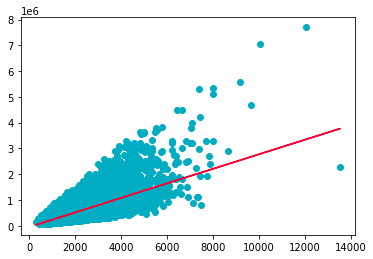

In [6]:
# Method 1
# Calculate slope'W_one' and intercept'w_zero' through the formula.

# Calculate sqft_living average
meanx = np.mean(x)
# Calculate price average
meany = np.mean(y)

def slope():
    a = x-meanx
    b = y-meany
    lenx = len(x)
    leny = len(y)
    t = sum(a*b)/sqrt(sum(a**2)*sum(b**2))
    sy = sqrt(sum(b**2)/lenx-1)
    sx = sqrt(sum(a**2)/lenx-1)
    w_one = t*sy/sx
    return w_one
w_one = slope()

def intercept():
    w_zero = meany - w_one * meanx
    return w_zero
w_zero = intercept()

def simpleLinearRegression(w_zero, w_one):
    y_hat = w_zero + w_one * x
    return y_hat
y_hat = simpleLinearRegression(w_zero, w_one)

txtslope = "Slope is: {}"
txtintercept = "Intercept is: {}"
print(txtslope.format(w_one))
print(txtintercept.format(w_zero))
# Draw the original scatter plot
plt.scatter(x, y, color='#00ACC1')
# Draw the line of linear regression
plt.plot(x, y_hat, color='#FF0033')
# Display the diagram
plt.show()

## Method 2- Predict using Scipy

In this method we will Create a function that uses the slope and intercept values to return a new value. This new value represents where on the y the corresponding x value will be placed.

Slope is: 281.95883963034254
Intercept is: -47116.07907289406


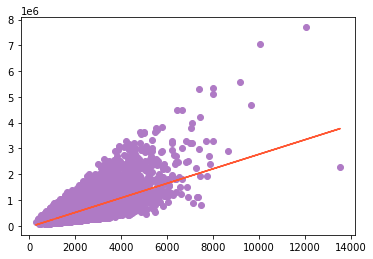

In [7]:
# Method 2
# Calculate slope'W_one' and intercept'w_zero' with Scipy
# SLR is abbreviation of Simple Linear Regression

# Execute a method that returns some important key values of Linear Regression
slope, intercept, r, p, std_err = stats.linregress(x, y)

def SLR(x):
  return slope * x + intercept

mymodel = list(map(SLR, x))
txtslope = "Slope is: {}"
txtintercept = "Intercept is: {}"
print(txtslope.format(slope))
print(txtintercept.format(intercept))
# Draw the original scatter plot
plt.scatter(x, y, color="#AF7AC5")
# Draw the line of linear regression
plt.plot(x, mymodel, color="#FF5733")
# Display the diagram
plt.show()